# Medical Cost Personal Insurance Project

By Mónica Atiaga

Batch - DSNB1222

### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
### Columns                                            
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

**Predict :** Can you accurately predict insurance costs?


### Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'datasets/medical_cost_insurance.csv'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis (EDA)


In [3]:
# checking the dimension of the dataset
df.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns. Out of which 1 is the target variable "charges" and the remaining 6 are independent variables described in the above section _Columns_.

In [4]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are three different types of data (int64, float64, and object) present in the dataset. 
* There is no null values.

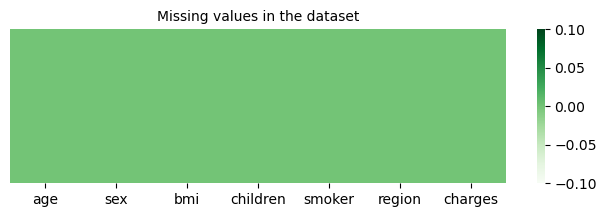

In [6]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Greens')
plt.title('Missing values in the dataset', fontsize=10);

### Summary statistics of the numerical and non-numerical variables

In [7]:
# Summary statistics of numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


From the above description of the numerical columns we can observe the following:

1. The counts of all the columns are the same which confirms there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in `'age'`, `'bmi'`, `'children'` columns which means the data is skewed to right.
3. Apparently there are no outlier values, however we are going to review the `bmi` column in more depth. The maximum value is far away from the Q3 three times the standard deviation.
4. There is not negative/invalid values present.
5. The average age is approximately 39 years old, with a range between 18 and 64 years old.
6. The average BMI is 30.66 and is above the ideal range (18.5 to 24.9)
7. The number of children is between 0 and 5 with an average of 1 children.

From the description of the non-numerical columns we can observe the following:

1. Looking at count we can see that there are no null values. There are 1338 values in each column.
2. In column `'sex'` and `'smoker'` there are two unique values, while in `'region'` there are 4 unique values. 
3. The top value for `sex` is male, for `smoker` is no, and for `region` is southeast

In [9]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


These are the unique values present in the dataset. Since the target value is continuous we have to do a regression analysis.

In [10]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['sex', 'smoker', 'region']
Numerical Columns: ['age', 'bmi', 'children', 'charges']


## Data Visualization


### Univariate Analysis

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

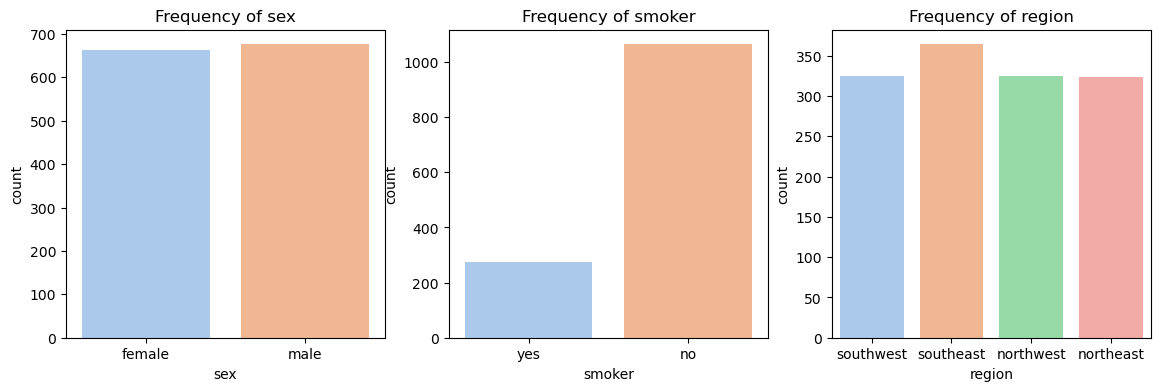

In [11]:
# Checking the value counts of the categorical independent variables)
for col in categorical_col:
    display(df[col].value_counts())

# Visualize the categorical variables
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

From the Frequency plot of each column, we can observe the following:
- The total number of males and females are almost the same.
- "Non-Smoker" count is high compared to "Yes Smoker" count by more than double.
- The frequencies of the regions are approximately balanced, only southeast is slightly higher.

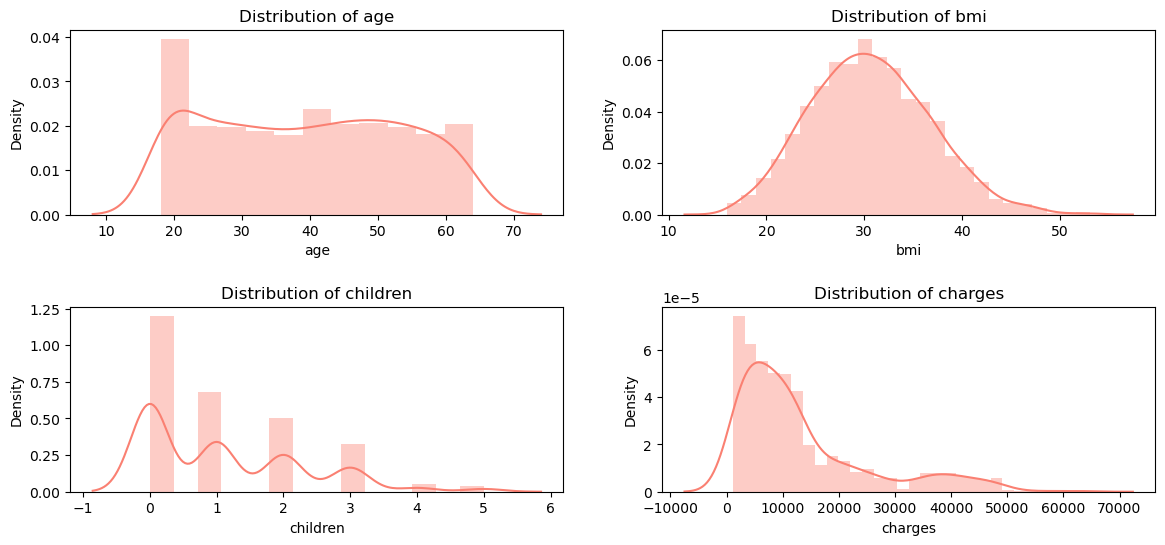

In [12]:
# Visualizing the distribution of the numerical columns 

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for ax, column in zip(axs.flat, numerical_col):
    sns.distplot( df[column], ax=ax,  color='salmon')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

From the above distribution plots we can notice the following:
- The data almost looks normal in age and bmi although there may be outliers in the bmi column.
- The data in the column Charges (target) is skewed to the right. Later we will transform the data to obtain a normal distribution that will allow me to improve the predictive model. 
- The data of the column children is discrete, with a majority of 0 children.

In [13]:
# Checking for skewness
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

`Charges` is the target variable, and `children` is a categorical variable, even when its values are numerical, so no need to remove skewness. 

### Distribution of Medical Charges
The target variable "Charges" has a right skewed distribution. We will apply a log transformation to obtain a normal distribution which can be beneficial for the application of linear regression models.

In [14]:
# Apply Log transformation to the target variable 
df['charges_log'] = np.log(df['charges'])
display(df.head())


,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,8.260197


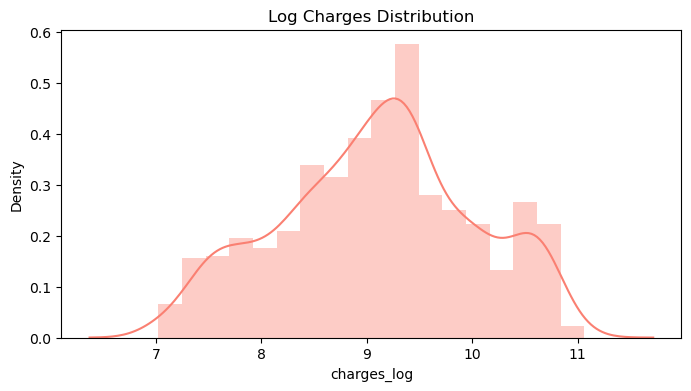

In [15]:
# Visualizing the Log Charges distribution
plt.figure(figsize=(8,4))
sns.distplot( df['charges_log'],  color='salmon')
plt.title(f"Log Charges Distribution")
plt.show()

As a result of the log transformation we have obtained a distribution closer to normal for the data of the target variable.

### Bivariate Analysis


#### Age Analysis
1. We are going to categorize by `age` to be able to analyze by segments the relationship of this variable with the medical expenses generated, later we will do a similar analysis with the variable `bmi`
2. Then, we will evaluate the relationship between the variables `bmi` and `age`

In [16]:
# Categories:  Young Adult (18-30), Middle Adult(31-55), Older Adult(55+)
age_categories = ['Young adult(18-30)','Middle adult(31-55)','Older adults(55+)']
conditions =[
    (df['age'] <= 30),
    ((df['age'] > 30) & (df['age'] <= 55)),
    (df['age'] > 55)
]
df['age_grp'] = np.select(conditions,age_categories, default="Other")

# Converting to ordered category
df['age_grp'] = df['age_grp'].astype('category')
df['age_grp'].cat.reorder_categories(
    new_categories=['Young adult(18-30)','Middle adult(31-55)','Older adults(55+)'],
    ordered = True,
    inplace = True)

In [17]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges,charges_log,age_grp
736,37,female,38.39,0,yes,southeast,40419.0191,10.607056,Middle adult(31-55)


#### Sumary for age group

In [18]:
# Grouping by age, summary of number of registrations, average BMI and charges for each age group.
grp_by_age = df.groupby(['age_grp']).agg({'age':'count', 'bmi':'mean','charges':'mean'})
grp_by_age

,age,bmi,charges
age_grp,,,
Young adult(18-30),444,29.890766,9397.552051
Middle adult(31-55),678,30.826593,14046.279079
Older adults(55+),216,31.739329,18795.993816


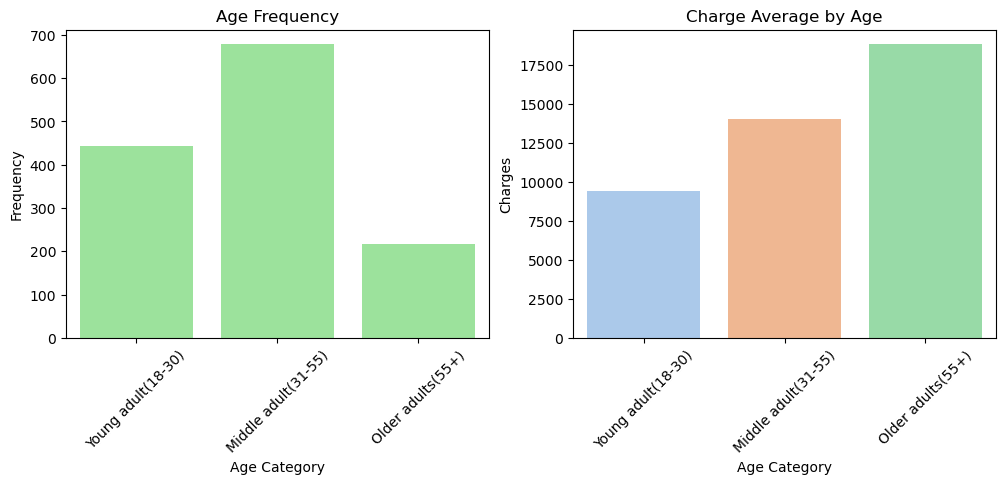

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set_palette('pastel')

# Visualizing the Frequency by age group
sns.countplot(data=df,  x='age_grp', color='lightgreen', ax=axes[0])
# Visualizing the charge mean by age group
sns.barplot(data=grp_by_age,x=grp_by_age.index,  y='charges',ax=axes[1])

# Rotate x-axis labels on both charts
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

axes[0].set_xlabel('Age Category')  # change xlabel
axes[1].set_xlabel('Age Category')  # change xlabel


axes[0].set_ylabel('Frequency')   # change ylabel
axes[1].set_ylabel('Charges')     # change ylabel

axes[0].set_title('Age Frequency')   
axes[1].set_title('Charge Average by Age')   

# plt.title(f"Frequency of Quality")
plt.show()

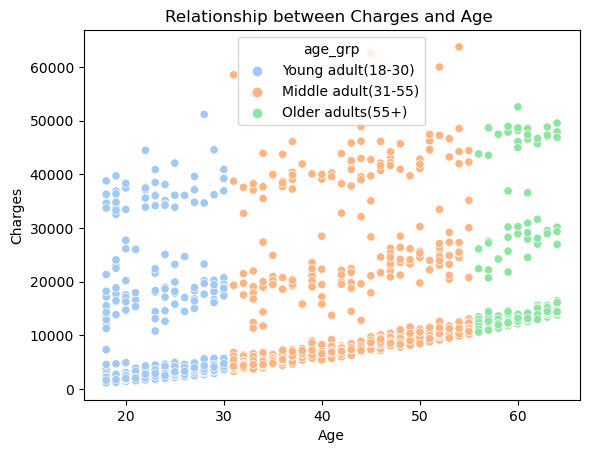

In [20]:
sns.scatterplot(data=df,  x='age', y='charges', hue='age_grp' )

plt.ylabel("Charges")
plt.xlabel("Age")
plt.title("Relationship between Charges and Age ")
plt.show()

- The largest group is in the age range between 31 and 55 years, with 678, with an average medical expense of 14046.27
- The minority group is in an age range of 56 years and older, specifically up to 64, which is the maximum value, and has an average medical expense of 18,795.99.
- The group in the age range between 18 and 30 years is represented in 444 with the average lower expenses 9397.55
- We can observe that there is a positive relationship, where medical expenses increase with older age.

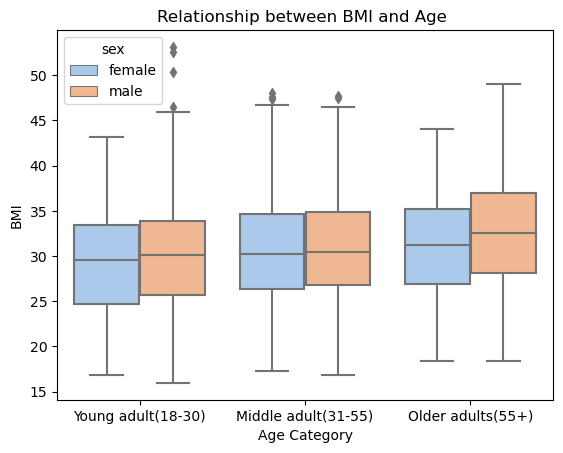

In [21]:
sns.boxplot(data=df, x='age_grp', y='bmi', hue='sex', showfliers=True)
plt.ylabel("BMI")
plt.xlabel("Age Category")
plt.title("Relationship between BMI and Age ")

plt.show()

- There is a slight increase related to age causing the median BMI to also increase more evident in the male group.
- Most of the BMI frequency is concentrated between 26 and 35.

#### BMI analysis

1. We are going to categorize by `bmi` to be able to analyze by segments the relationship of this variable with the medical expenses generated and other variables

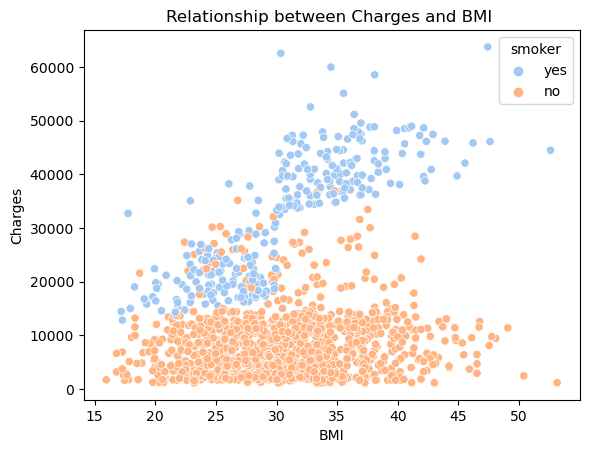

In [22]:
sns.scatterplot(data=df,  x='bmi', y='charges', hue='smoker' )

plt.ylabel("Charges")
plt.xlabel("BMI")
plt.title("Relationship between Charges and BMI ")
plt.show()

We can observe there is a positive relation between BMI and Charges especially with smokers, and the relation for the non-smokers is less incremental

##### BMI Categories

- **Underweight:** BMI is less than 18.5
- **Normal weight:** BMI is 18.5 to 24.9
- **Overweight:** BMI is 25 to 29.9
- **Obese:** BMI is 30 or more

In [23]:
# Categories 
bmi_categories = ['Underweight','Normal weight','Overweight', 'Obese']
conditions_bmi =[
    (df['bmi'] <= 18.5),
    ((df['bmi'] > 18.5) & (df['bmi'] < 25)),
    ((df['bmi'] >= 25) & (df['bmi'] < 30)),
    (df['bmi'] >= 30)
]
df['bmi_grp'] = np.select(conditions_bmi, bmi_categories, default="Other")

# Converting to ordered category
df['bmi_grp'] = df['bmi_grp'].astype('category')
df['bmi_grp'].cat.reorder_categories(
    new_categories = ['Underweight','Normal weight','Overweight', 'Obese'],
    ordered = True,
    inplace = True)

In [24]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges,charges_log,age_grp,bmi_grp
938,18,male,26.180,2,no,southeast,2304.0022,7.742403,Young adult(18-30),Overweight
143,29,male,29.735,2,no,northwest,18157.8760,9.806860,Young adult(18-30),Overweight
92,59,male,29.830,3,yes,northeast,30184.9367,10.315098,Older adults(55+),Overweight


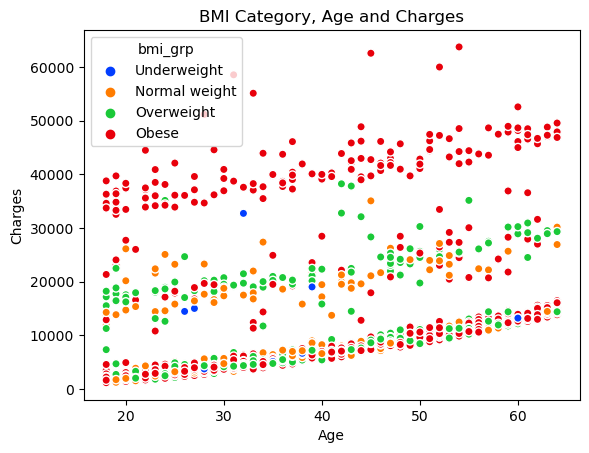

In [25]:
sns.scatterplot(x="age", y="charges", hue="bmi_grp", data=df, linewidth=1, palette='bright')
plt.ylabel("Charges")
plt.xlabel("Age")
plt.title("BMI Category, Age and Charges")
plt.show()

- We observe there is a evident increment in Charges in the Overweight and Obese BMI Categories. It is notable how the red group (Obese category) is at the top in relation to medical charges, followed by the green group (overweight).

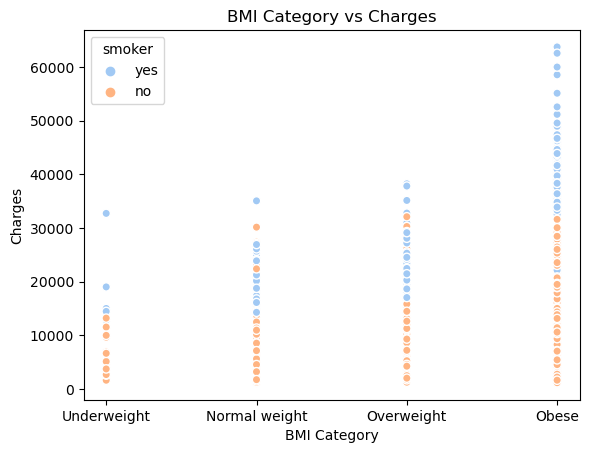

In [26]:
sns.scatterplot(x="bmi_grp", y="charges", hue="smoker", data=df, linewidth=1, palette='pastel')
plt.ylabel("Charges")
plt.xlabel("BMI Category")
plt.title("BMI Category vs Charges")
plt.show()

- We observed that the smoker subgroup has the highest values in medical charges compared to non-smokers. But the number of non-smoking patients is greater.

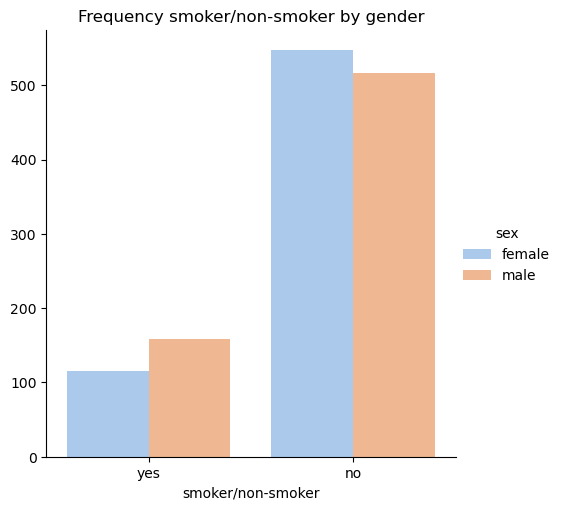

In [27]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pastel", data=df)
plt.ylabel("")
plt.xlabel("smoker/non-smoker")
plt.title("Frequency smoker/non-smoker by gender")
plt.show()

- The number of non-smoking patients is greater than smoking patients. 

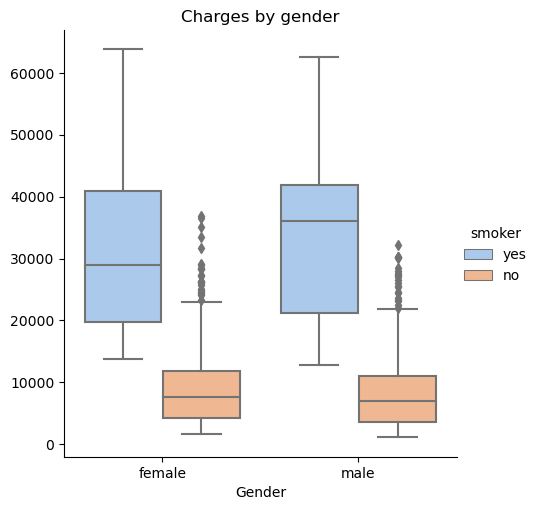

In [28]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="box", data=df, palette = 'pastel')
plt.ylabel("")
plt.xlabel("Gender")
plt.title("Charges by gender")
plt.show()

### Multivariate Analysis

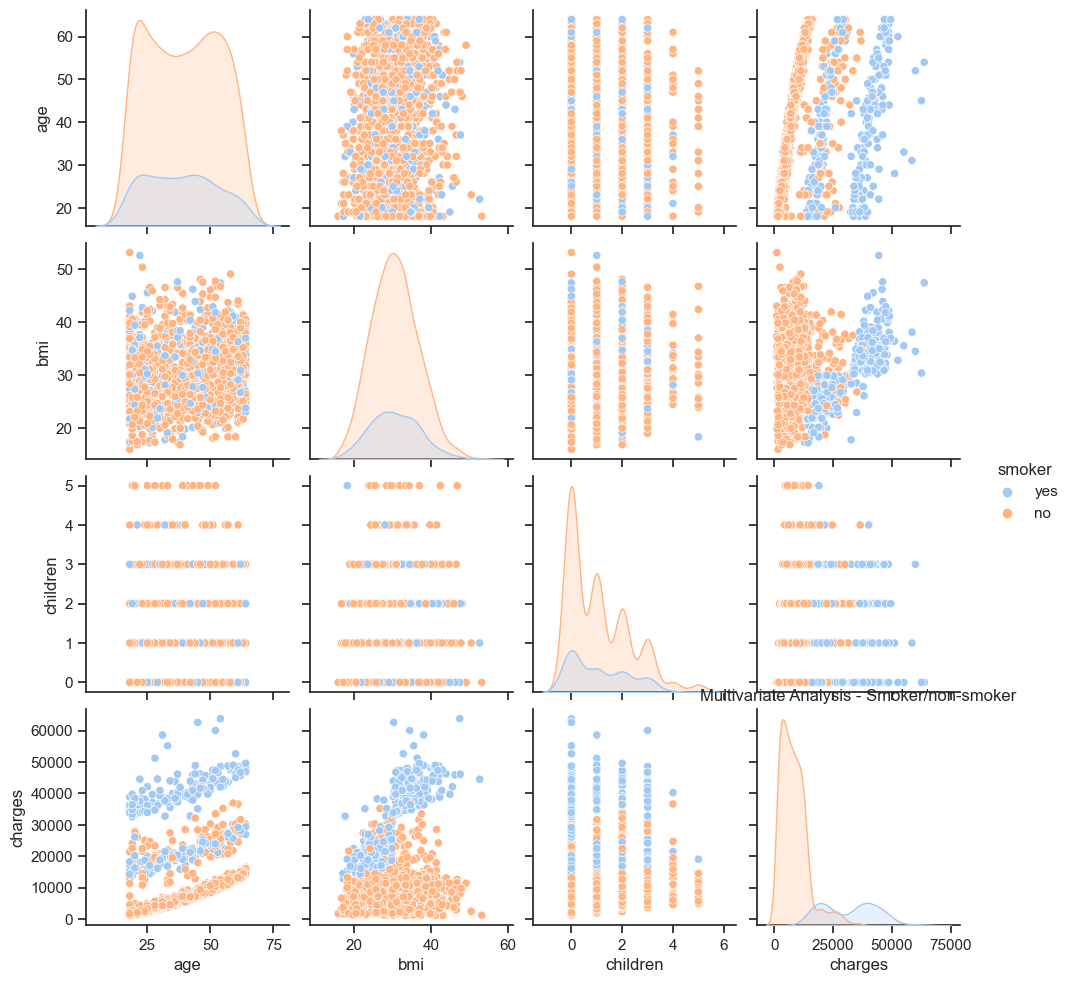

In [29]:
sns.set(style="ticks")
sns.pairplot(df.drop('charges_log', axis=1), hue="smoker", palette='pastel')

plt.title("Multivariate Analysis - Smoker/non-smoker")
plt.show()


We observed that the smoker subgroup has the highest values in medical charges compared to non-smokers. But the number of non-smoking patients is greater.

### Encoding categorical columns
Preprocessing the data to train the regression model. As we know the models understand numbers, so it is necessary to encode the categorical data, in our case the columns 'sex', 'smoker', and 'region'.
- For the 'region' column we apply One-Hot encoding considering that the regions have no specific order and the model is expected to treat each region equally.

In [30]:
# Encoding columns Sex and Smoker
encoding_dict = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1}
                 }

df_encoded = df.drop(['age_grp'], axis = 1 )
df_encoded.replace(encoding_dict, inplace=True)

# One-Hot Encoding - column region
df_encoded = pd.get_dummies(df_encoded, columns=['region'], prefix=['r'])

# Arranging the columns
df_encoded = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker',
       'r_northeast', 'r_northwest', 'r_southeast', 'r_southwest', 'charges', 'charges_log']]

# Presenting the dataframe
df_encoded.head()


,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,0,0,0,1,16884.92400,9.734176
1,18,0,33.770,1,0,0,0,1,0,1725.55230,7.453302
2,28,0,33.000,3,0,0,0,1,0,4449.46200,8.400538
3,33,0,22.705,0,0,0,1,0,0,21984.47061,9.998092
4,32,0,28.880,0,0,0,1,0,0,3866.85520,8.260197


Now we can continue with building the model and training it with the data prepared.

### Removing outliers

In [31]:
from scipy.stats import zscore

z = np.abs(zscore(df_encoded))
z

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,1.438764,1.010519,0.453320,0.908614,1.970587,0.565267,0.566418,0.611324,1.765481,0.298584,0.691394
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.565267,0.566418,1.635795,0.566418,0.953689,1.790020
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.565267,0.566418,1.635795,0.566418,0.728675,0.759500
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.565267,1.765481,0.611324,0.566418,0.719843,0.978513
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.565267,1.765481,0.611324,0.566418,0.776802,0.912181
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.565267,1.765481,0.611324,0.566418,0.220551,0.184949
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.769076,0.566418,0.611324,0.566418,0.914002,1.522799
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.565267,0.566418,1.635795,0.566418,0.961596,1.852106
1336,1.296362,1.010519,0.797813,0.908614,0.507463,0.565267,0.566418,0.611324,1.765481,0.930362,1.625129


In [33]:
df_new = df_encoded[(z.iloc[:,:9]<3).all(axis=1)]

print(f"{df_encoded.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_encoded.shape[0] - df_new.shape[0]) / df_encoded.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_encoded.shape[1]} columns.")
df_encoded = df_new
df_encoded

22 rows with outliers were deleted.
This represent 1.64% of the data.
In the new dataset there are 1316 rows and 11 columns.


,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,0,0,0,1,16884.92400,9.734176
1,18,0,33.770,1,0,0,0,1,0,1725.55230,7.453302
2,28,0,33.000,3,0,0,0,1,0,4449.46200,8.400538
3,33,0,22.705,0,0,0,1,0,0,21984.47061,9.998092
4,32,0,28.880,0,0,0,1,0,0,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,1,0,0,10600.54830,9.268661
1334,18,1,31.920,0,0,1,0,0,0,2205.98080,7.698927
1335,18,1,36.850,0,0,0,0,1,0,1629.83350,7.396233
1336,21,1,25.800,0,0,0,0,0,1,2007.94500,7.604867


#### Correlation between target variable and independent variables.

In [34]:
# Checking the correlation between features and the target.
cor = df_encoded.drop(['charges_log'], axis = 1).corr()
cor

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges
age,1.000000,0.017673,0.119062,0.058319,-0.025751,0.002643,-0.003489,-0.012706,0.014036,0.299554
sex,0.017673,1.000000,-0.039934,-0.015315,-0.079468,0.005222,0.007002,-0.013449,0.001647,-0.059243
bmi,0.119062,-0.039934,1.000000,0.027706,0.004988,-0.137067,-0.133719,0.260734,0.001986,0.203195
children,0.058319,-0.015315,0.027706,1.000000,0.025409,-0.017165,0.047027,-0.029475,0.000426,0.090870
smoker,-0.025751,-0.079468,0.004988,0.025409,1.000000,0.002856,-0.039059,0.071234,-0.037388,0.786772
r_northeast,0.002643,0.005222,-0.137067,-0.017165,0.002856,1.000000,-0.324607,-0.344552,-0.319954,0.006525
r_northwest,-0.003489,0.007002,-0.133719,0.047027,-0.039059,-0.324607,1.000000,-0.346682,-0.321932,-0.042276
r_southeast,-0.012706,-0.013449,0.260734,-0.029475,0.071234,-0.344552,-0.346682,1.000000,-0.341713,0.074166
r_southwest,0.014036,0.001647,0.001986,0.000426,-0.037388,-0.319954,-0.321932,-0.341713,1.000000,-0.040873
charges,0.299554,-0.059243,0.203195,0.090870,0.786772,0.006525,-0.042276,0.074166,-0.040873,1.000000


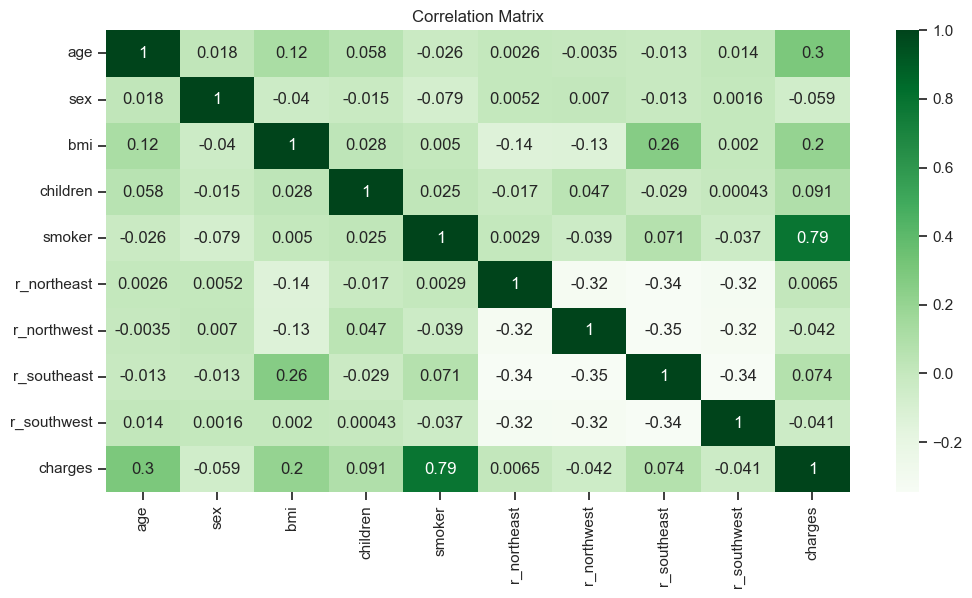

In [35]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Greens', annot=True)
plt.title('Correlation Matrix');

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

- The target have a strong positive correlation with smoker(0.79), and a lower positive correlation with age(0.3), and bmi (0.2).
- There is no significant correlation between any of the independent variables. Therefore we do not have a multicollinearity problem.
- Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation


In [36]:
cor['charges'].sort_values(ascending = False).to_frame()

,charges
charges,1.000000
smoker,0.786772
age,0.299554
bmi,0.203195
children,0.090870
r_southeast,0.074166
r_northeast,0.006525
r_southwest,-0.040873
r_northwest,-0.042276
sex,-0.059243


The target have a strong positive correlation with smoker variable.

In [37]:
# Droping the columns with less correlation with target variable
df_encoded.drop(['children', 'sex','r_southeast', 'r_northeast', 'r_southwest', 'r_northwest'], axis=1, inplace=True)

In [38]:
df_encoded.head()

,age,bmi,smoker,charges,charges_log
0,19,27.900,1,16884.92400,9.734176
1,18,33.770,0,1725.55230,7.453302
2,28,33.000,0,4449.46200,8.400538
3,33,22.705,0,21984.47061,9.998092
4,32,28.880,0,3866.85520,8.260197


### Review the skewness and the data distribution prior to building the model

In [40]:
df_encoded.skew().sort_values(ascending=False)

charges        1.501055
smoker         1.450367
bmi            0.193564
age            0.049904
charges_log   -0.091977
dtype: float64

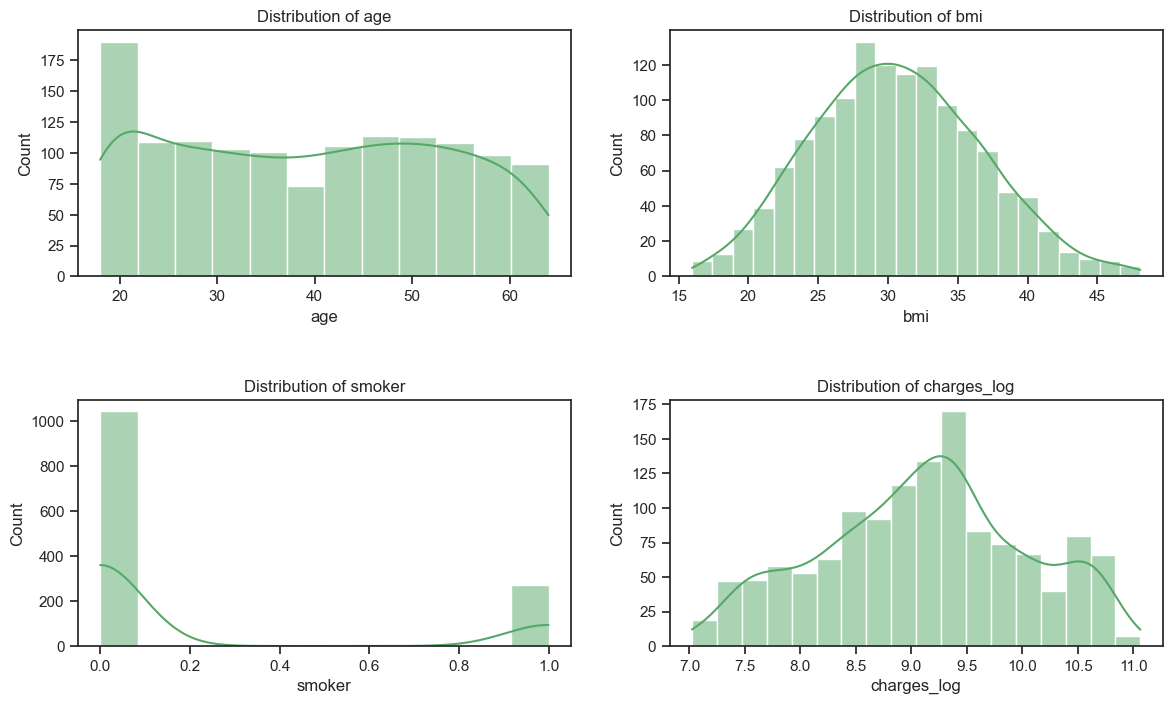

In [47]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, df_encoded.drop(['charges'], axis = 1).columns):
    sns.histplot(data=df_encoded, x=column, ax=ax, kde=True, color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

### Separating features and label

In [39]:
x = df_encoded.drop(['charges', 'charges_log'], axis = 1)
y = df_encoded['charges_log']

#### Feature Scaling using Standard Scalarization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,bmi,smoker
0,-1.441444,-0.453768,1.959141
1,-1.512509,0.527239,-0.510428
2,-0.801858,0.398555,-0.510428
3,-0.446533,-1.321967,-0.510428
4,-0.517598,-0.289988,-0.510428
...,...,...,...
1311,0.761574,0.059297,-0.510428
1312,-1.512509,0.218063,-0.510428
1313,-1.512509,1.041975,-0.510428
1314,-1.299314,-0.804724,-0.510428


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

#### Checking Variance Inflation Factor (VIF)


In [52]:
# Finding variance inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
0,age,1.015094
1,bmi,1.014446
2,smoker,1.000729


As we can see after the standarization there is no multicollinearit issue. We can continue with model building

##  Modeling


#### Creating train test split

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=145)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (921, 3)
x_test shape:   (395, 3)
y_train shape:  (921,)
y_test shape:   (395,)


#### Regression algorithms

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [99]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

#### Linear Regression

In [100]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [0.49192794 0.07097437 0.64198683]

LR intercept_ : 9.106706454410157
LR score train  : 0.7563776361633625
LR score test   : 0.7205403945421411
********** E R R O R **********
Mean squared error: 0.2347
Root Mean squared error: 0.4845
Cross-validation results (R2): [0.81317764 0.75950835 0.67903827 0.66255696 0.78792882 0.8124588
 0.82112229 0.64951827 0.66173767 0.76448308]
Average R2: 0.7412
R2_Score(test): 0.7205


#### DecisionTreeRegressor

In [101]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.4428
Root Mean squared error: 0.6654
Cross-validation results (R2): [0.61585574 0.49828734 0.61394884 0.61207772 0.55364278]
Average R2: 0.5788
R2_Score(test): 0.4729


#### RandomForest Regressor

In [109]:
%%time
rfr = RandomForestRegressor()
parameters = {'n_estimators':[100, 600, 1000], # Number of trees in the forest
             'max_features': ["auto"],
             'max_depth':[None, 40, 50, 60], # Maximum depth of the trees
             'min_samples_split': [5, 7, 9], # Minimum number of samples required to split an internal node
             'min_samples_leaf': [7, 10, 12], # Minimum number of samples required to be at a leaf node
             'criterion': ['mse'],
             'bootstrap': [True, False]}  # Whether to use bootstrap samples when building trees

grid_cv = GridSearchCV(estimator = rfr, param_grid=parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)


Wall time: 4min 5s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['mse'],
                         'max_depth': [None, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 600, 1000]})

In [114]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)


# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)


Best parameters : {'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 9, 'n_estimators': 100}
Best score : 0.8127491325011924
Best Estimator:  RandomForestRegressor(criterion='mse', max_depth=40, min_samples_leaf=12,
                      min_samples_split=9)
********** E R R O R **********
Mean squared error: 0.1856
Root Mean squared error: 0.4308
Cross-validation results (R2): 0.8127491325011924
Average R2: 0.8127
R2_Score(test): 0.7790


In [123]:
# Display a comparation
eval_model

,Model,RMSE,R2_Score(test),CV_Mean
0,LinearRegression(),0.484501,0.720540,0.741153
1,DecisionTreeRegressor(random_state=42),0.665416,0.472872,0.578762
2,"(DecisionTreeRegressor(max_depth=40, max_featu...",0.430845,0.779011,0.812749


##### Conclusion:
Below is a comparative table of the performance of the regression models applied. Among which the best option is the DecisionTreeRegressor with the selected parameters.

#### Saving the model

In [117]:
#Save the Best Model
import joblib

joblib.dump(best_estimator, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [122]:
# Load the Model for Future Predictions
loaded_model = joblib.load('best_random_forest_model.pkl')
predictions = loaded_model.predict(x_train)
predictions

array([ 7.86665305,  7.85891279,  8.98388744,  8.69741447,  8.17477961,
        8.28621658,  9.62922206, 10.59396702,  8.73516806,  9.56634693,
        8.49968501, 10.15711404,  9.20516903,  8.23161143,  8.1836828 ,
        9.44730831,  8.20643166, 10.14972435,  9.44493737,  7.81245475,
       10.75964887,  9.50849196,  9.39382683,  9.11834787, 10.57956285,
        9.58003936,  9.62142796,  9.62980682,  8.8939946 ,  8.44871742,
        9.63004632,  9.43050567,  8.44871742,  9.21684016,  7.50537074,
        9.44626527,  8.50504194,  8.34292707,  7.97675947, 10.71304148,
        9.51549198,  9.5570178 ,  9.03665128,  8.6099452 ,  8.49675874,
       10.04272959,  8.55952298,  8.57527106,  8.51781351,  9.5141902 ,
        9.27603984, 10.06613357,  8.27321787,  9.57358986, 10.648292  ,
        7.50537074,  8.8813387 ,  7.81049491,  9.12601689, 10.65849121,
       10.58211731,  8.46842516,  9.01182169,  9.55998949,  9.26273136,
        8.83345878, 10.68417561, 10.15387041,  8.48822153,  9.20

All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python.
By Monica Atiaga 

Ref.:
https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html